# Final Exam

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import warnings

from scipy import stats


from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
# from lightgbm import LGBMClassifier
# from sklearn.ensemble import HistGradientBoostingClassifier
# from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
# from numpy.random import RandomState
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


# Ignore notebook warnings to keep it clearer
warnings.filterwarnings('ignore')

# This is a magic function that renders the plot in the notebook itself.
%matplotlib inline 
# To see all the content in the column
pd.set_option('max_colwidth', 300)

In [2]:
# Setting options to display all rows and columns
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [3]:
URL= "https://raw.githubusercontent.com/subashgandyer/datasets/main/great_customers.csv"

In [4]:
df = pd.read_csv(URL)

In [5]:
df.head(10)

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN,0
1,1012811,25.0,private,76597.00,9,Divorced,sales,caucasian,Female,0.0,0.0,30,256.0,NaN,0
2,1006870,21.0,private,47947.25,10,Never-married,clerical,caucasian,Female,0.0,0.0,10,442.0,276.0,0
3,1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN,0
4,1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0,0
5,1022394,26.0,private,59060.50,15,Never-married,professional,caucasian,Female,0.0,0.0,30,177.0,377.0,0
6,1026358,58.0,private,56400.75,5,Divorced,farm,not_caucasian,Male,0.0,0.0,40,11.0,98.0,0
7,1026126,23.0,private,11329.25,10,Divorced,sales,caucasian,Female,0.0,0.0,40,29.0,276.0,0
8,1011738,14.0,private,21850.50,10,Never-married,craft,caucasian,Male,0.0,0.0,40,375.0,NaN,0
9,1024034,33.0,private,55331.00,9,Never-married,factory,not_caucasian,Female,0.0,0.0,40,375.0,77.0,0


In [6]:
df.shape

(13599, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 13599 non-null  int64  
 1   age                     13178 non-null  float64
 2   workclass               13056 non-null  object 
 3   salary                  13177 non-null  float64
 4   education_rank          13599 non-null  int64  
 5   marital-status          13599 non-null  object 
 6   occupation              13056 non-null  object 
 7   race                    13599 non-null  object 
 8   sex                     13599 non-null  object 
 9   mins_beerdrinking_year  13175 non-null  float64
 10  mins_exercising_year    13178 non-null  float64
 11  works_hours             13599 non-null  int64  
 12  tea_per_year            11170 non-null  float64
 13  coffee_per_year         11188 non-null  float64
 14  great_customer_class    13599 non-null

In [8]:
df.describe()

,user_id,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
count,1.359900e+04,13178.000000,13177.000000,13599.000000,13175.000000,13178.000000,13599.000000,11170.000000,11188.000000,13599.000000
mean,1.033131e+06,44.842009,37149.297355,10.675417,447.920607,46.034224,39.916317,217.276544,359.708169,0.085889
std,1.603004e+04,16.050574,24316.155119,2.224582,4782.134102,294.234126,9.839082,113.944411,164.680579,0.280210
min,1.000006e+06,14.000000,4872.750000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.019192e+06,30.000000,20885.500000,9.000000,0.000000,0.000000,40.000000,175.000000,223.750000,0.000000
50%,1.038625e+06,50.000000,25912.750000,12.000000,0.000000,0.000000,40.000000,175.000000,447.000000,0.000000
75%,1.048161e+06,59.000000,48908.750000,12.000000,0.000000,0.000000,40.000000,276.000000,499.000000,0.000000
max,1.048839e+06,90.000000,363858.750000,16.000000,99999.000000,3900.000000,99.000000,499.000000,499.000000,1.000000


In [9]:
df.isna().sum()

user_id                      0
age                        421
workclass                  543
salary                     422
education_rank               0
marital-status               0
occupation                 543
race                         0
sex                          0
mins_beerdrinking_year     424
mins_exercising_year       421
works_hours                  0
tea_per_year              2429
coffee_per_year           2411
great_customer_class         0
dtype: int64

<AxesSubplot:>

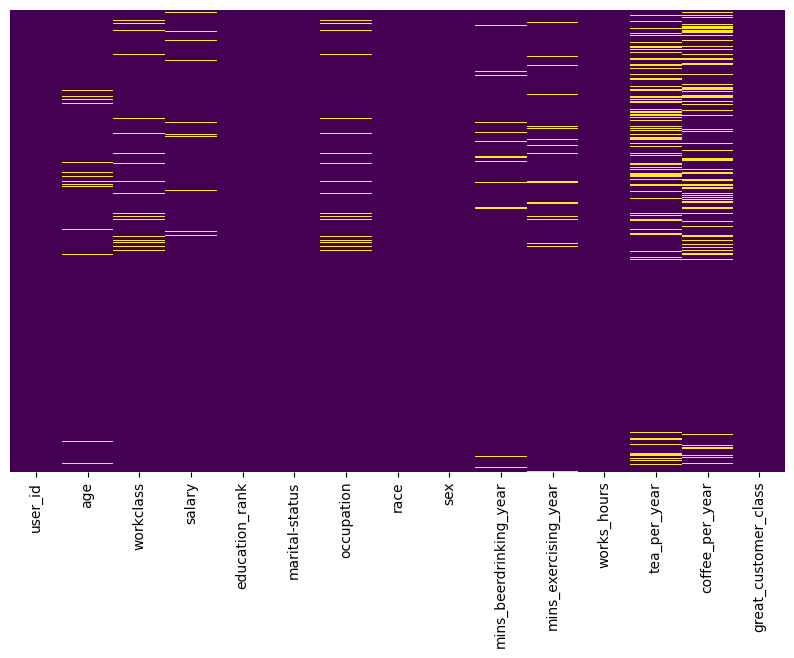

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [11]:
# Separate Label in Train DF
y_df= df.pop('great_customer_class')

In [72]:
y_df.value_counts(ascending=True)

1     1168
0    12431
Name: great_customer_class, dtype: int64

# This is a very imbalancd class, so the best score should be Recall!

In [12]:
# df = df.drop('great_customer_class', axis=1)

In [13]:
df.head(15)

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year
0,1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN
1,1012811,25.0,private,76597.00,9,Divorced,sales,caucasian,Female,0.0,0.0,30,256.0,NaN
2,1006870,21.0,private,47947.25,10,Never-married,clerical,caucasian,Female,0.0,0.0,10,442.0,276.0
3,1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN
4,1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0
5,1022394,26.0,private,59060.50,15,Never-married,professional,caucasian,Female,0.0,0.0,30,177.0,377.0
6,1026358,58.0,private,56400.75,5,Divorced,farm,not_caucasian,Male,0.0,0.0,40,11.0,98.0
7,1026126,23.0,private,11329.25,10,Divorced,sales,caucasian,Female,0.0,0.0,40,29.0,276.0
8,1011738,14.0,private,21850.50,10,Never-married,craft,caucasian,Male,0.0,0.0,40,375.0,NaN
9,1024034,33.0,private,55331.00,9,Never-married,factory,not_caucasian,Female,0.0,0.0,40,375.0,77.0


In [14]:
print("UNIQUE VALUES:\n")
for col in df:
    print(col)
    print( len(df[col].unique()))
    print( df[col].unique())

UNIQUE VALUES:

user_id
8599
[1004889 1012811 1006870 ... 1041214 1038013 1017676]
age
74
[14. 25. 21. 23. 26. 58. 33. 40. 18. 59. 47. 76. 35. 30. 67. 20. 44. 19.
 51. 32. 29. 50. 41. 24. 36. 46. 34. 22. nan 64. 52. 39. 48. 27. 57. 37.
 54. 28. 53. 31. 43. 38. 45. 17. 56. 16. 55. 60. 65. 73. 69. 61. 49. 78.
 82. 71. 63. 42. 66. 75. 62. 72. 85. 77. 68. 90. 70. 80. 79. 74. 81. 88.
 84. 83.]
workclass
4
['private' 'self_employed' 'government' nan]
salary
7207
[70773.   76597.   47947.25 ... 16590.   25536.75 57656.  ]
education_rank
16
[ 9 10  7 15  5 12 14  2 13 11  8  4  6  3 16  1]
marital-status
4
['Never-married' 'Divorced' 'Married' 'Widowed']
occupation
15
['sales' 'clerical' 'professional' 'farm' 'craft' 'factory' 'tech' nan
 'service' 'executive' 'trucker' 'cleaner' 'lawenf' 'estate_agent'
 'soldier']
race
2
['not_caucasian' 'caucasian']
sex
2
['Male' 'Female']
mins_beerdrinking_year
97
[    0.    nan  2176.  3456.  5013.  1173.  2885.  4650.  4101.  1797.
  1848.  2174.   594.  

### Processing numerical features

In [15]:
# create a variable to hold the names of the data types viz int16, in32 and so on
num_cols = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Filter out variables with numeric data types
df_numcols = df.select_dtypes(include=num_cols)
df_numcols

,user_id,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year
0,1004889,14.0,70773.00,9,0.0,0.0,40,399.0,NaN
1,1012811,25.0,76597.00,9,0.0,0.0,30,256.0,NaN
2,1006870,21.0,47947.25,10,0.0,0.0,10,442.0,276.0
3,1022149,23.0,41740.25,7,0.0,0.0,20,NaN,NaN
4,1029558,26.0,NaN,9,NaN,0.0,36,NaN,120.0
...,...,...,...,...,...,...,...,...,...
13594,1016807,42.0,55293.00,13,0.0,NaN,40,277.0,268.0
13595,1038859,58.0,25928.25,14,0.0,0.0,40,337.0,NaN
13596,1041214,75.0,16590.00,7,NaN,0.0,35,NaN,NaN
13597,1038013,45.0,25536.75,11,0.0,0.0,40,99.0,79.0


In [16]:
numcols_names = df_numcols.columns.tolist()
imputer = KNNImputer(n_neighbors=3)
# df_numcols=pd.DataFrame(imputer.fit_transform(df_numcols), columns =numcols_names)
imputer.fit_transform(df_numcols)

array([[1.00488900e+06, 1.40000000e+01, 7.07730000e+04, ...,
        4.00000000e+01, 3.99000000e+02, 2.62333333e+02],
       [1.01281100e+06, 2.50000000e+01, 7.65970000e+04, ...,
        3.00000000e+01, 2.56000000e+02, 1.87000000e+02],
       [1.00687000e+06, 2.10000000e+01, 4.79472500e+04, ...,
        1.00000000e+01, 4.42000000e+02, 2.76000000e+02],
       ...,
       [1.04121400e+06, 7.50000000e+01, 1.65900000e+04, ...,
        3.50000000e+01, 2.02333333e+02, 2.92666667e+02],
       [1.03801300e+06, 4.50000000e+01, 2.55367500e+04, ...,
        4.00000000e+01, 9.90000000e+01, 7.90000000e+01],
       [1.01767600e+06, 4.20000000e+01, 5.76560000e+04, ...,
        4.00000000e+01, 2.40000000e+01, 3.73000000e+02]])

In [17]:
df_numcols= pd.DataFrame(imputer.fit_transform(df_numcols), columns =numcols_names)
df_numcols

,user_id,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year
0,1004889.0,14.0,70773.00,9.0,0.0,0.0,40.0,399.000000,262.333333
1,1012811.0,25.0,76597.00,9.0,0.0,0.0,30.0,256.000000,187.000000
2,1006870.0,21.0,47947.25,10.0,0.0,0.0,10.0,442.000000,276.000000
3,1022149.0,23.0,41740.25,7.0,0.0,0.0,20.0,366.666667,299.000000
4,1029558.0,26.0,39595.25,9.0,0.0,0.0,36.0,214.000000,120.000000
...,...,...,...,...,...,...,...,...,...
13594,1016807.0,42.0,55293.00,13.0,0.0,0.0,40.0,277.000000,268.000000
13595,1038859.0,58.0,25928.25,14.0,0.0,0.0,40.0,337.000000,69.666667
13596,1041214.0,75.0,16590.00,7.0,0.0,0.0,35.0,202.333333,292.666667
13597,1038013.0,45.0,25536.75,11.0,0.0,0.0,40.0,99.000000,79.000000


<AxesSubplot:>

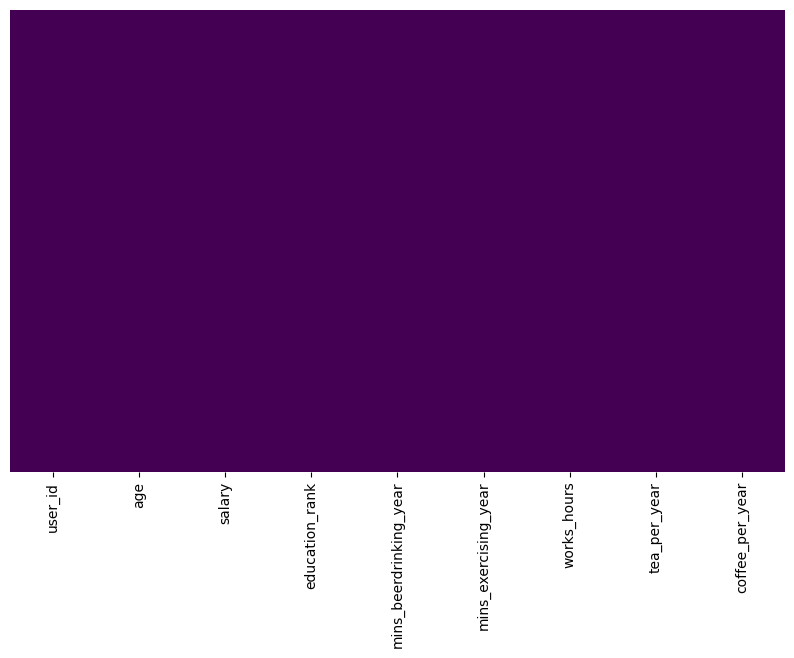

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numcols.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [19]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

# Scaling down the numeric variables
# We exclude SalePrice using iloc() on train_numcols_only data frame
df_numcols = pd.DataFrame(min_max.fit_transform(df_numcols.iloc[:,0:36]), 
                                columns=df_numcols.iloc[:,0:36].columns.tolist())
df_numcols

,user_id,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year
0,0.099994,0.000000,0.183573,0.533333,0.0,0.0,0.397959,0.799197,0.524766
1,0.262220,0.144737,0.199797,0.533333,0.0,0.0,0.295918,0.512048,0.373494
2,0.140561,0.092105,0.119989,0.600000,0.0,0.0,0.091837,0.885542,0.552209
3,0.453443,0.118421,0.102699,0.400000,0.0,0.0,0.193878,0.734270,0.598394
4,0.605165,0.157895,0.096724,0.533333,0.0,0.0,0.357143,0.427711,0.238956
...,...,...,...,...,...,...,...,...,...
13594,0.344050,0.368421,0.140452,0.800000,0.0,0.0,0.397959,0.554217,0.536145
13595,0.795630,0.578947,0.058653,0.866667,0.0,0.0,0.397959,0.674699,0.137885
13596,0.843856,0.802632,0.032640,0.400000,0.0,0.0,0.346939,0.404284,0.585676
13597,0.778306,0.407895,0.057562,0.666667,0.0,0.0,0.397959,0.196787,0.156627


In [20]:
df_numcols.shape

(13599, 9)

### Processing Categorical Variables

In [21]:
# We exclude all numeric columns
df_catcol = df.select_dtypes(exclude=num_cols)
df_catcol

,workclass,marital-status,occupation,race,sex
0,private,Never-married,sales,not_caucasian,Male
1,private,Divorced,sales,caucasian,Female
2,private,Never-married,clerical,caucasian,Female
3,private,Divorced,sales,caucasian,Female
4,private,Married,sales,not_caucasian,Male
...,...,...,...,...,...
13594,private,Married,executive,caucasian,Male
13595,self_employed,Married,sales,caucasian,Male
13596,self_employed,Married,executive,caucasian,Male
13597,private,Divorced,executive,caucasian,Male


In [22]:
df_catcol.isna().sum()

workclass         543
marital-status      0
occupation        543
race                0
sex                 0
dtype: int64

<AxesSubplot:>

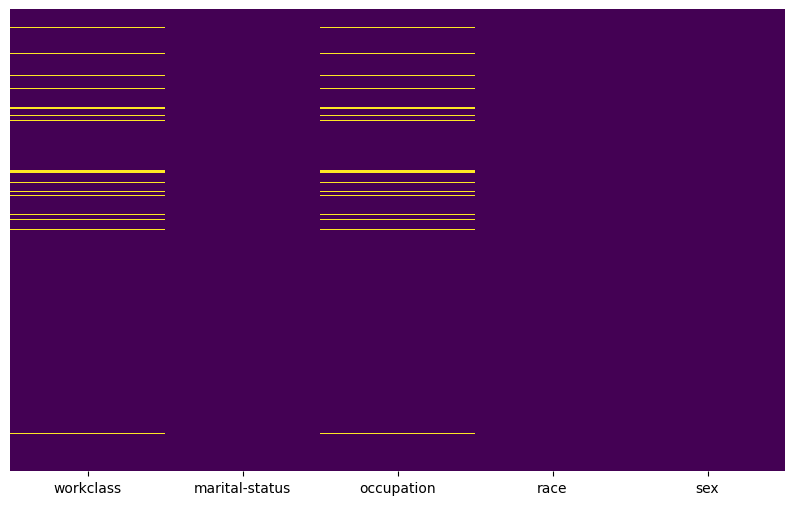

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df_catcol.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [24]:
catcols = df_catcol.columns.tolist()
imputer_mode = SimpleImputer(missing_values=pd.NA, strategy='most_frequent')
df_catcol= pd.DataFrame(imputer_mode.fit_transform(df_catcol), columns =catcols)

In [25]:
df_catcol

,workclass,marital-status,occupation,race,sex
0,private,Never-married,sales,not_caucasian,Male
1,private,Divorced,sales,caucasian,Female
2,private,Never-married,clerical,caucasian,Female
3,private,Divorced,sales,caucasian,Female
4,private,Married,sales,not_caucasian,Male
...,...,...,...,...,...
13594,private,Married,executive,caucasian,Male
13595,self_employed,Married,sales,caucasian,Male
13596,self_employed,Married,executive,caucasian,Male
13597,private,Divorced,executive,caucasian,Male


<AxesSubplot:>

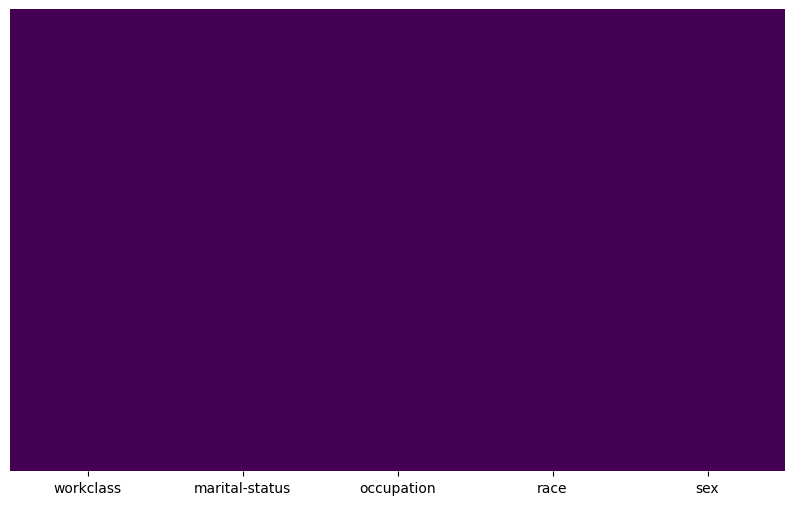

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df_catcol.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [27]:
# Steps to one-hot encoding:
# - We iterate through each categorical column name
# - Create encoded variables for each categorical columns
# - Concatenate the encoded variables column to the data frame
# - Remove the original categorical variable column
for col in df_catcol.columns.values:
    one_hot_encoded_variables = pd.get_dummies(df_catcol[col], prefix=col, sparse=False)
    df_catcol = pd.concat([df_catcol, one_hot_encoded_variables], axis=1)
    df_catcol.drop([col],axis=1, inplace=True)

In [28]:
df_catcol

,workclass_government,workclass_private,workclass_self_employed,marital-status_Divorced,marital-status_Married,marital-status_Never-married,marital-status_Widowed,occupation_cleaner,occupation_clerical,occupation_craft,occupation_estate_agent,occupation_executive,occupation_factory,occupation_farm,occupation_lawenf,occupation_professional,occupation_sales,occupation_service,occupation_soldier,occupation_tech,occupation_trucker,race_caucasian,race_not_caucasian,sex_Female,sex_Male
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
13595,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
13596,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
13597,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [29]:
df_catcol.shape

(13599, 25)

### Join numerical and Categorical FEatures

In [30]:
# Concatenate both numeric and one-hot encoded columns in the data frame
df_final = pd.concat([df_numcols, df_catcol], axis=1)

In [31]:
df_final

,user_id,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,workclass_government,workclass_private,workclass_self_employed,marital-status_Divorced,marital-status_Married,marital-status_Never-married,marital-status_Widowed,occupation_cleaner,occupation_clerical,occupation_craft,occupation_estate_agent,occupation_executive,occupation_factory,occupation_farm,occupation_lawenf,occupation_professional,occupation_sales,occupation_service,occupation_soldier,occupation_tech,occupation_trucker,race_caucasian,race_not_caucasian,sex_Female,sex_Male
0,0.099994,0.000000,0.183573,0.533333,0.0,0.0,0.397959,0.799197,0.524766,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0.262220,0.144737,0.199797,0.533333,0.0,0.0,0.295918,0.512048,0.373494,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,0.140561,0.092105,0.119989,0.600000,0.0,0.0,0.091837,0.885542,0.552209,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.453443,0.118421,0.102699,0.400000,0.0,0.0,0.193878,0.734270,0.598394,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,0.605165,0.157895,0.096724,0.533333,0.0,0.0,0.357143,0.427711,0.238956,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0.344050,0.368421,0.140452,0.800000,0.0,0.0,0.397959,0.554217,0.536145,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
13595,0.795630,0.578947,0.058653,0.866667,0.0,0.0,0.397959,0.674699,0.137885,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
13596,0.843856,0.802632,0.032640,0.400000,0.0,0.0,0.346939,0.404284,0.585676,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
13597,0.778306,0.407895,0.057562,0.666667,0.0,0.0,0.397959,0.196787,0.156627,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [32]:
df_final.shape

(13599, 34)

<AxesSubplot:>

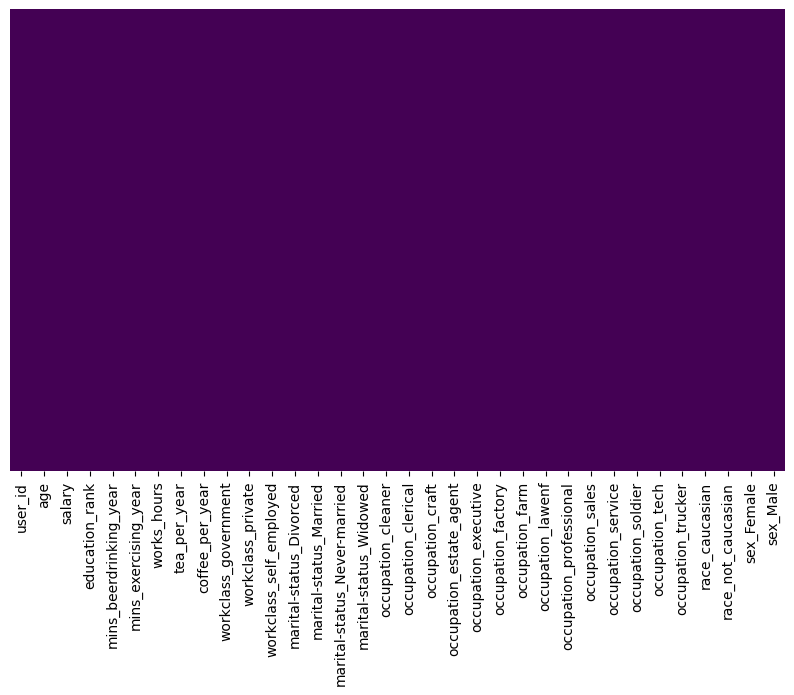

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df_final.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Separate in Training and Validation sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_final, y_df, test_size=0.3, random_state=49)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9519, 34), (4080, 34), (9519,), (4080,))

### Feature Selection:

In [35]:
# model1 = RandomForestClassifier()
# model2 = SVC()
# model3 = LogisticRegression(random_state=1)
# model4 = gnb = GaussianNB()
# model5 = KNeighborsClassifier()

# models =[model1, model2, model3, model4, model5]

In [36]:
# for model in models:
#     model.fit(X_train, y_train)
#     print ("Model {} \nHas an accuracy of: {}".format(model, model.score(X_test, y_test)))

In [37]:
# model_voting = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('knn', model3)], voting='hard')

In [38]:
# model_voting.fit(X_train, y_train)

In [39]:
# model.score(X_test, y_test)

### Pearson Correlation function

In [40]:
def cor_selector(X, y,num_feats):
    # Your code goes here (Multiple lines)
    
    # Make a feature list
    feature_name = X.columns.tolist()
    
    # Calculate the correlation with y for each feature and collect all correlation values in a list
    cor_list = []  
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    
    # Replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    #Choose the feature
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    
    #Feature Selection or not
    cor_support = [True if i in cor_feature else False for i in feature_name]
    
    # Your code ends here
    return cor_support, cor_feature

### List the selected features from Pearson Correlation

## Filter Feature Selection - Chi-Square

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

### Chi-Squared Selector function

In [42]:
def chi_squared_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    
    # Make a feature list
    feature_name = X.columns.tolist()
    
    # Apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k= num_feats)
    
    # Train the model
    topfeatures = bestfeatures.fit(X,y)
    topfeatures.scores_
    
    # Create dataframes from Scores and Features
    chi_feature = X.iloc[:,np.argsort(np.abs(topfeatures.scores_))[-num_feats:]].columns.tolist()
    chi_support = [True if i in chi_feature else False for i in feature_name]
    
    # Your code ends here
    return chi_support, chi_feature


### List the selected features from Chi-Square 

## Wrapper Feature Selection - Recursive Feature Elimination

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

### RFE Selector function

In [44]:
def rfe_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    
    # Build a Logistic Regression model
    lr = LogisticRegression(solver='lbfgs')
    
    # Build RFE model with Logistic Regression as Learning Algorithm / Estimator
    rfe_lr = RFE(estimator=lr,
                 n_features_to_select=num_feats,
                 step=1,
                 verbose=0  # verbose=5
                 )
    # Train the RFE model
    rfe_lr = rfe_lr.fit(X, y)
    
    # Get Support from the model
    rfe_lr_support = rfe_lr.get_support()
    
    # Best features from the model
    rfe_lr_feature = X.loc[:, rfe_lr_support].columns.tolist()
    
    # Your code ends here
    return rfe_lr_support, rfe_lr_feature

### List the selected features from RFE

## Embedded Selection - Lasso: SelectFromModel

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [46]:
def embedded_log_reg_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    
    #Build a Logistic Regression model
    logreg = LogisticRegression(penalty='l1', solver='liblinear')
    
    # Build Embedded model with Logistic Regression as Learning Algorithm / Estimator
    embedded_lr_selector = SelectFromModel(LogisticRegression(penalty='l1', 
                                                              solver='liblinear', 
                                                              max_iter=50000),
                                                              max_features=num_feats)
    #Train the RFE model
    embedded_lr_selector = embedded_lr_selector.fit(X, y)
    
    # Get Support from the model
    embedded_lr_support = embedded_lr_selector.get_support()
    
    # Best features from the model
    embedded_lr_feature = X.loc[:, embedded_lr_support].columns.tolist()
    
    # Your code ends here
    return embedded_lr_support, embedded_lr_feature

## Tree based(Random Forest): SelectFromModel

In [47]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [48]:
def embedded_rf_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    
    # Build the Random Forest model¶
    rf = RandomForestClassifier(n_estimators=100)
    
    # Build the Embedded model with Random Forest as the Learning Algorithm
    embedded_rf_selector = SelectFromModel(rf, max_features=num_feats)
    
    # Train the model
    embedded_rf_selector = embedded_rf_selector.fit(X, y)
    
    # Get support
    embedded_rf_support = embedded_rf_selector.get_support()
    
    # Best Features
    embedded_rf_feature = X.loc[:, embedded_rf_support].columns.tolist()
    
    # Your code ends here
    return embedded_rf_support, embedded_rf_feature

## Tree based(Light GBM): SelectFromModel

In [49]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

In [50]:
def embedded_lgbm_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    
    # Choose LightGBM as your learning algorithm
    lgbmc = LGBMClassifier(n_estimators=500,
                           learning_rate=0.05,
                           num_leaves=32,
                           colsample_bytree=0.2,
                           reg_alpha=3,
                           reg_lambda=1,
                           min_split_gain=0.01,
                           min_child_weight=40
                          )
    
    # Build a Embedded model with LGBM as learning algorithm
    embedded_lgbm_selector = SelectFromModel(lgbmc, max_features=num_feats)
    
    # Train the model
    embedded_lgbm_selector = embedded_lgbm_selector.fit(X, y)
    
    # Get the support
    embedded_lgbm_support = embedded_lgbm_selector.get_support()
    
    # Get the feature names
    embedded_lgbm_feature = X.loc[:, embedded_lgbm_support].columns.tolist()
    
    # Your code ends here
    return embedded_lgbm_support, embedded_lgbm_feature

In [60]:
def autoFeatureSelector(X, y, num_feats =10, methods=[]):
    # Parameters
    # data - dataset to be analyzed (csv file)
    # methods - various feature selection methods we outlined before, use them all here (list)
    
    # preprocessing
#     X, y, num_feats = preprocess_dataset(dataset_path)
    feature_name = list(X.columns)
    dict_keys = ['Feature'] + methods
    dict_values =[feature_name]
        
    # Run every method we outlined above from the methods list and collect returned best features from every method
    if 'pearson' in methods:
        cor_support, cor_feature = cor_selector(X, y,num_feats)
        dict_values.append(cor_support)
    if 'chi-square' in methods:
        chi_support, chi_feature = chi_squared_selector(X, y,num_feats)
        dict_values.append(chi_support)
    if 'rfe' in methods:
        rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
        dict_values.append(rfe_support)
    if 'log-reg' in methods:
        embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
        dict_values.append(embedded_lr_support)
    if 'rf' in methods:
        embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
        dict_values.append(embedded_rf_support)
    if 'lgbm' in methods:
        embedded_lgbm_support, embedded_lgbm_feature = embedded_lgbm_selector(X, y, num_feats)
        dict_values.append(embedded_lgbm_support)
    
    # Combine all the above feature list and count the maximum set of features that got selected by all methods
    
    #### Your Code starts here (Multiple lines)
    
    pd.set_option('display.max_rows', None)

    # put all selection together
    dict_of_selectors = dict(zip(dict_keys, dict_values))
    feature_selection_df = pd.DataFrame(dict_of_selectors)

    # feature_selection_df
    
    # count the selected times for each feature
    feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

    # display the top 100
    feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
    feature_selection_df.index = range(1, len(feature_selection_df)+1)
    # print(feature_selection_df.head(num_feats))
    # best_features = pd.DataFrame(feature_selection_df.head(num_feats))
    best_features = pd.DataFrame(feature_selection_df.head(num_feats))['Feature']#.to_list()
    #### Your Code ends here
    return best_features

In [61]:
%%time
best_features = autoFeatureSelector(X = X_train, 
                                    y= y_train, 
                                    num_feats =10, 
                                    methods=['pearson', 
                                             'chi-square', 
                                             'rfe', 
                                             'log-reg', 
                                             'rf', 
                                             'lgbm'])
best_features

CPU times: total: 4.3 s
Wall time: 2.55 s


1                 works_hours
2      mins_beerdrinking_year
3      marital-status_Married
4     workclass_self_employed
5                      salary
6        occupation_executive
7        mins_exercising_year
8              education_rank
9                         age
10                    user_id
Name: Feature, dtype: object

In [63]:
print('As a list: ')
best_features.tolist()

As a list: 


['works_hours',
 'mins_beerdrinking_year',
 'marital-status_Married',
 'workclass_self_employed',
 'salary',
 'occupation_executive',
 'mins_exercising_year',
 'education_rank',
 'age',
 'user_id']

### Model Definitions:
Eventhough I have the best featurews selected, I decided to  use the **full set of features** in my models for the following reasons:
- To get the best accuracy
- There are not too many features
- It is a relatevelu small tabular dataset
- It is still extremely fast

In [64]:
%%time
model1 = RandomForestClassifier()
model2 = SVC()
model3 = LogisticRegression(random_state=1)
model4 = gnb = GaussianNB()
model5 = KNeighborsClassifier()

models =[model1, model2, model3, model4, model5]

CPU times: total: 0 ns
Wall time: 720 µs


In [77]:
%%time
for model in models:
    model.fit(X_train, y_train)
    recall = recall_score(y_test, model.predict(X_test), average='macro')
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print ("Model {} \nHas a recall of: {}\nand an accuracy of {}".format(model, recall, accuracy))
    

Model RandomForestClassifier() 
Has a recall of: 0.6989930737442523
and an accuracy of 0.9401960784313725
Model SVC() 
Has a recall of: 0.6507653803620278
and an accuracy of 0.9313725490196079
Model LogisticRegression(random_state=1) 
Has a recall of: 0.6935510156568302
and an accuracy of 0.9350490196078431
Model GaussianNB() 
Has a recall of: 0.7917816192305454
and an accuracy of 0.6549019607843137
Model KNeighborsClassifier() 
Has a recall of: 0.6684186019440079
and an accuracy of 0.9203431372549019
CPU times: total: 6.41 s
Wall time: 3.03 s


In [78]:
%%time
model_voting = VotingClassifier(estimators=[('RF', model1), 
                                            ('SVC', model2), 
                                            ('LR', model3), 
                                            ('NB', model4), 
                                            ('KNN', model5)], voting='hard')

CPU times: total: 0 ns
Wall time: 0 ns


In [79]:
model_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('SVC', SVC()),
                             ('LR', LogisticRegression(random_state=1)),
                             ('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier())])

In [81]:
model.fit(X_train, y_train)
recall = recall_score(y_test, model.predict(X_test), average='macro')
print("Recall = {}".format(recall))

Recall = 0.6684186019440079


In [84]:
print("Accuracy = {}".format(model.score(X_test, y_test)))

Accuracy = 0.9203431372549019


### Comment: The the voting model RECALL decreased (0.668) with respect to the best model (0.7917).

### The appropiate Score is RECALL